# Naive Bayes Multinomial (Sentence Prediction)

## A. Data Preparation

### A.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [2]:
try:
    df = pd.read_csv('mldataset_v1.csv')
    print("Berhasil membaca data")
except Exception as e:
    print("Gagal membaca data")

Berhasil membaca data


### A.3 Mengecek Dimensi Data

In [3]:
df.shape

(600, 334)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 334 entries, to to label
dtypes: int64(334)
memory usage: 1.5 MB


In [5]:
df.head()

,to,based,on,of,their,and,you,model,different,classify,...,attributes,height,other,color,fabric,style,call,caller,phone,label
0,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## B. Data Preprocessing

### B.1 Fungsi Membersihkan Teks

In [ ]:
def clean_text(text):
    if not isinstance(text, str): return ""
    
    text = text.lower()
    text = str.replace(r'[^a-z\s]', '', regex=True)
    text = text.strip()
    
    return text
    

## C. Exploratory Data Analysis (EDA)

### C.1 Mengecek Sampel Target

In [7]:
df.columns

Index(['to', 'based', 'on', 'of', 'their', 'and', 'you', 'model', 'different',
       'classify',
       ...
       'attributes', 'height', 'other', 'color', 'fabric', 'style', 'call',
       'caller', 'phone', 'label'],
      dtype='object', length=334)

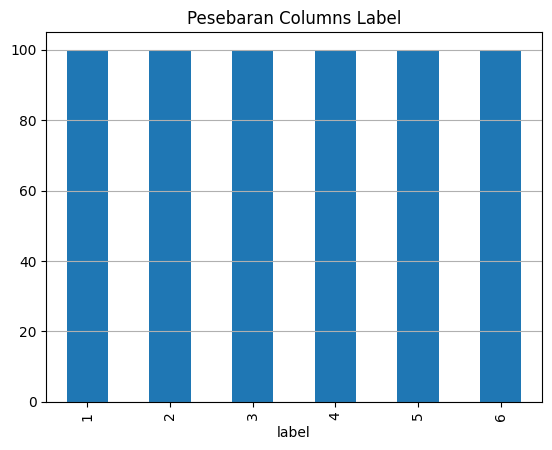

In [8]:
df['label'].value_counts().plot(kind='bar').set_title("Pesebaran Columns Label")
plt.grid(axis='y')
plt.show()

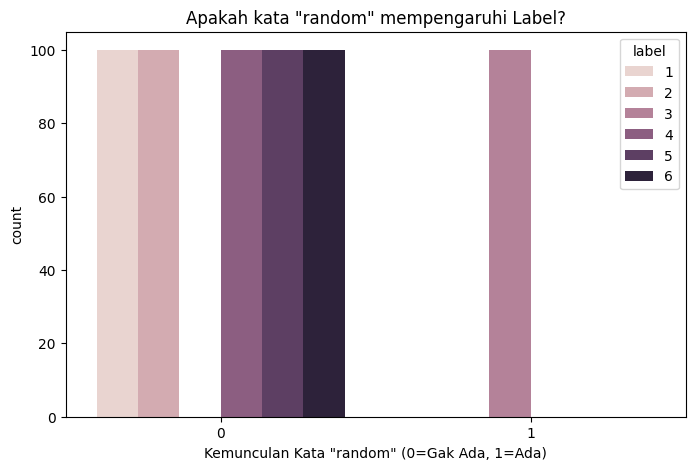

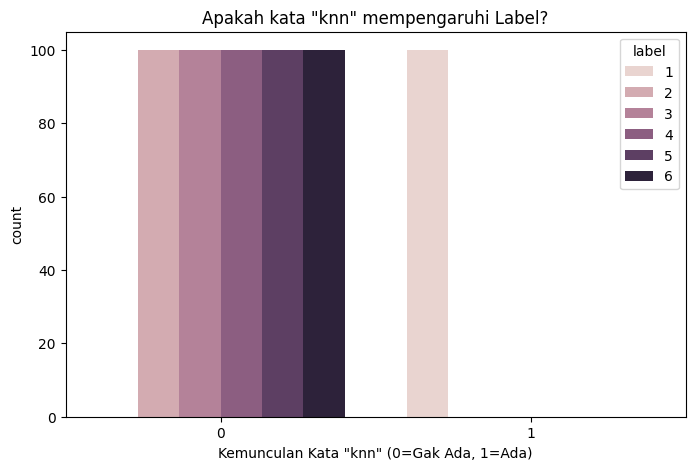

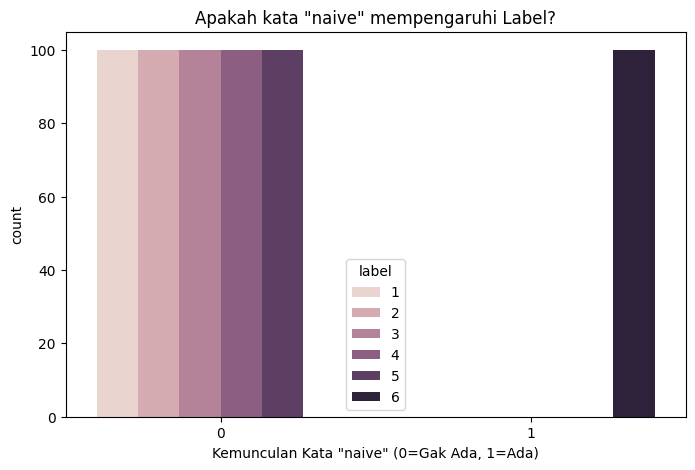

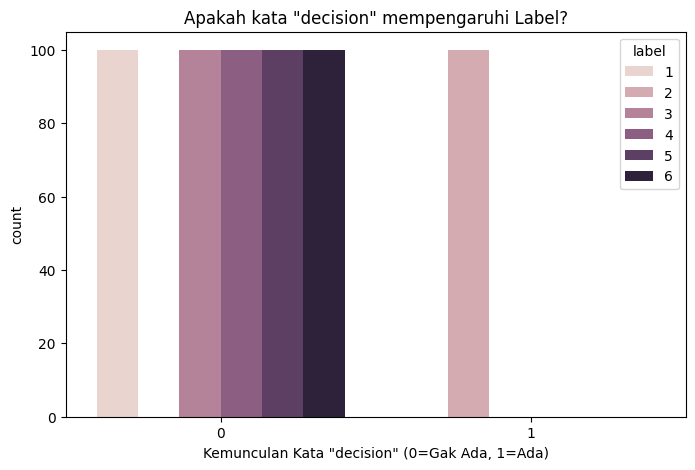

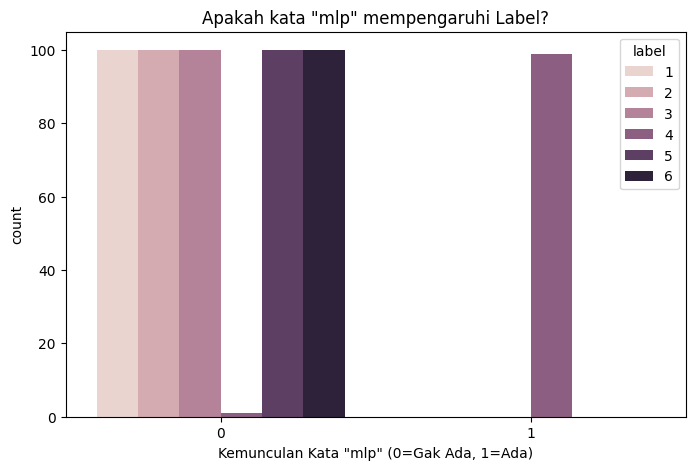

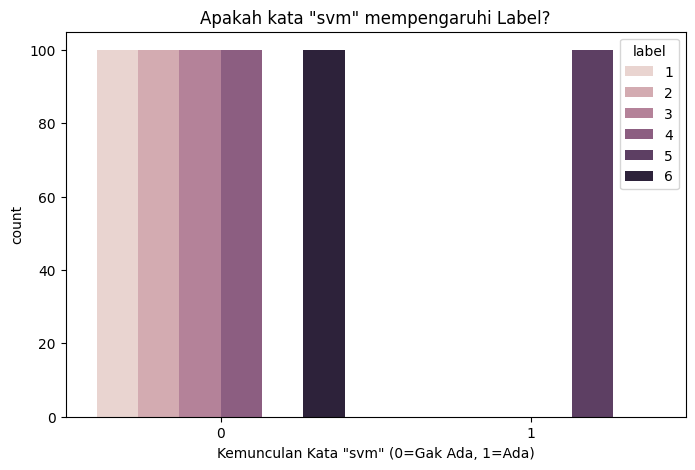

In [ ]:
kata_1 = 'random' 
kata_2 = 'knn'
kata_3 = 'naive'
kata_4 = 'decision'
kata_5 = 'mlp'
kata_6 = 'svm'
target = 'label'

plt.figure(figsize=(8, 5))
sns.countplot(x=kata_1, hue=target, data=df)
plt.title(f'Apakah kata "{kata_1}" mempengaruhi Label?')
plt.xlabel(f'Kemunculan Kata "{kata_1}" (0=Gak Ada, 1=Ada)')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=kata_2, hue=target, data=df)
plt.title(f'Apakah kata "{kata_2}" mempengaruhi Label?')
plt.xlabel(f'Kemunculan Kata "{kata_2}" (0=Gak Ada, 1=Ada)')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=kata_3, hue=target, data=df)
plt.title(f'Apakah kata "{kata_3}" mempengaruhi Label?')
plt.xlabel(f'Kemunculan Kata "{kata_3}" (0=Gak Ada, 1=Ada)')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=kata_4, hue=target, data=df)
plt.title(f'Apakah kata "{kata_4}" mempengaruhi Label?')
plt.xlabel(f'Kemunculan Kata "{kata_4}" (0=Gak Ada, 1=Ada)')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=kata_5, hue=target, data=df)
plt.title(f'Apakah kata "{kata_5}" mempengaruhi Label?')
plt.xlabel(f'Kemunculan Kata "{kata_5}" (0=Gak Ada, 1=Ada)')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=kata_6, hue=target, data=df)
plt.title(f'Apakah kata "{kata_6}" mempengaruhi Label?')
plt.xlabel(f'Kemunculan Kata "{kata_6}" (0=Gak Ada, 1=Ada)')
plt.show()

## D. Modelling

### D.1 Membuat Variabel X dan y

In [10]:
X = df.drop(columns='label')
y = df['label']

### D.2 Splitting Data Training dan Data Test

In [11]:
def stratified_split_data(X, y, train_size=0.8, random_state=42, frac=None):
    np.random.seed(random_state)
    
    if frac:
        X = X.sample(frac=frac, random_state=random_state)
        y = y.loc[X.index]
        
    X_train_list, X_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y):
        class_idx = np.where(y == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X.iloc[idx[:split_ratio]])
        X_test_list.append(X.iloc[idx[split_ratio:]])
        y_train_list.append(y.iloc[idx[:split_ratio]])
        y_test_list.append(y.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split_data(X, y )

### D.3 Membuat Class NaiveBayesMultinomial

In [12]:
class NaiveBayesMultinomial:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        # Menghitung prior
        self._priors = np.zeros(n_classes, dtype=np.float64)

        # Mengelompokkan likelihood
        self._feature_probs = np.zeros((n_classes, n_features), dtype=np.float64)
        
        for idx, c in enumerate(self._classes):
            # Ambil semua data milik kelas ini
            X_c = X[y == c]
            # Hitung Prior Kelas
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            
            # Hitung jumlah kemunculan tiap kata di kelas
            total_count_per_word = X_c.sum(axis=0)
            
            # Total semua kata dalam kelas
            total_word_in_class = X_c.sum()
            
            #RUMUS MULTINOMIAL
            self._feature_probs[idx, :] = (total_count_per_word + 1) / (total_word_in_class + n_features)
            
            # Ambil Vocab Atau Urutan data
            self.vocabulary = df.drop(columns='label').columns.tolist()
            
    def predict(self, X):
        y_pred = [self._predict_one(x) for x in X]
        return np.array(y_pred)
    
    
    def predict_single(self, text):
        if not isinstance(text, str): return ""
        
        # 1. Cleaning
        text_clean = text.lower()
        text_clean = str.replace(r'[^a-z\s]', '', text_clean)
        text_user = text_clean.strip()
        
        # 2. Vectorizing (Ubah jadi angka berdasarkan vocab)
        vector_input = np.array([1 if kata in text_user else 0 for kata in self.vocabulary])
        
        # 3. Prediksi (Panggil _predict_one dengan vektor angka)
        return self._predict_one(vector_input)
    
    def _predict_one(self, x):
        posteriors = []
        
        #menghitung probabilitas posterior untuk setiap class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            likelihood = np.sum(x * np.log(self._feature_probs[idx]))
            posterior = prior + likelihood
            posteriors.append(posterior)
            
        return self._classes[np.argmax(posteriors)]
            

## E. Evaluasi Model

### E.1 Evaluasi Akurasi Test & Train

In [13]:
nbm = NaiveBayesMultinomial()
nbm.fit(X_train.values, y_train.values)
predictions = nbm.predict(X_test.values)
print(predictions)

[1 1 1 1 2 1 1 1 1 6 1 1 4 1 1 6 1 1 6 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 4 5 4 4 5 4 5 4 5 4 4 4 4
 4 4 4 4 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6]


In [14]:
test_accuracy = np.sum(predictions == y_test) / len(X_test)
test_accuracy

np.float64(0.9)

In [15]:
predictions_train = nbm.predict(X_train.values)

In [16]:
train_accuracy = np.sum(predictions_train == y_train) / len(X_train)
print(train_accuracy)

0.9895833333333334


### E.2 Evaluasi Precision, Recall, Confusion Matrix

In [17]:
# 1. Buat Confusion Matrix Otomatis (Multiclass)
# Ini akan membuat tabel 6x6 (Baris=Asli, Kolom=Prediksi)
cm_df = pd.crosstab(y_test, predictions, rownames=['Aktual'], colnames=['Prediksi'])

print("--- Confusion Matrix ---")
print(cm_df)

# 2. Hitung Akurasi Manual dari Tabel
# Jumlahkan diagonal utama (yang benar) dibagi total data
diag = np.diag(cm_df) # Ambil angka diagonal (1-1, 2-2, dst)
total_benar = np.sum(diag)
total_data = np.sum(cm_df.values)

akurasi = total_benar / total_data
print(f"\nAkurasi Total: {akurasi:.2%}")

# 3. Hitung Precision & Recall per Kelas (Opsional tapi Keren)
# Precision = Diagonal / Total Kolom
# Recall = Diagonal / Total Baris
print("\n--- Detail per Kelas ---")
for label in cm_df.index:
    # TP = Angka di diagonal untuk label ini
    TP = cm_df.loc[label, label]
    
    # FN = Total Baris dikurangi TP
    Total_Asli = cm_df.loc[label].sum()
    FN = Total_Asli - TP
    
    # FP = Total Kolom dikurangi TP
    Total_Prediksi = cm_df[label].sum()
    FP = Total_Prediksi - TP
    
    # Hitung
    prec = TP / (TP + FP) if (TP + FP) > 0 else 0
    rec = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    print(f"Kelas {label} -> Precision: {prec:.2f}, Recall: {rec:.2f}")

--- Confusion Matrix ---
Prediksi   1   2   3   4   5   6
Aktual                          
1         15   1   0   1   0   3
2          0  20   0   0   0   0
3          0   0  20   0   0   0
4          0   0   0  14   6   0
5          0   0   0   1  19   0
6          0   0   0   0   0  20

Akurasi Total: 90.00%

--- Detail per Kelas ---
Kelas 1 -> Precision: 1.00, Recall: 0.75
Kelas 2 -> Precision: 0.95, Recall: 1.00
Kelas 3 -> Precision: 1.00, Recall: 1.00
Kelas 4 -> Precision: 0.88, Recall: 0.70
Kelas 5 -> Precision: 0.76, Recall: 0.95
Kelas 6 -> Precision: 0.87, Recall: 1.00


### E.3 Evaluasi Data Baru (GUI)

In [18]:

# # Simpan semua komponen method ke dalam satu file zip (pakai numpy)
# np.savez('model_nbm.npz',
# priors = nbm._priors,
# likelihood = nbm._feature_probs,
# classes = nbm._classes,
# vocab = vocabulary)

# print("Model tersimpan")

In [19]:
import tkinter as tk
from tkinter import *
from tkinter import messagebox


try:
    model = nbm
    print("Berhasil memanggil model")
except Exception as e:
    model = None
    print("Gagal mengambil model")

def cek_data_baru():
    data_baru = entry_data.get("1.0", tk.END).strip()
        
    if not data_baru:
        messagebox.showwarning('Input kosong', 'tolong input data yang benar')
        return
    
    hasil = model.predict_single(data_baru)
        
    label_hasil.config(text=f"Kategori: {hasil}", fg='blue')

# GUI UTAMA
root = tk.Tk()

root.title("Prediksi Naive Bayes Multinomial")
root.geometry("700x600")
root.configure(bg="lightblue")

judul = Label(root,text="Prediksi Teks", font=("Arial", 20, "bold"), bg="lightblue")
judul.pack()

deskripsi = Label(root,text="Naive Bayes Multinomial", font=("Arial", 10, "underline"), bg="lightblue")
deskripsi.pack(pady=(0, 30))

entry_data = Text(root, width=40, height=20, bg="gray", fg="white")
entry_data.pack()

enter_data = Button(text="Kirim Teks", command=cek_data_baru)
enter_data.pack(pady=30)

label_hasil = Label(text="...")
label_hasil.pack()

root.mainloop()

Berhasil memanggil model
